In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_test=pd.read_csv("train.csv")
df_train=pd.read_csv("test.csv")
df_train.head(3)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0


In [13]:
df=df_train.append(df_test, ignore_index=True)

In [17]:
df.head(2)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,NaN
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,NaN


In [26]:
df["Machine failure"].replace(to_replace=np.NaN,
    value=0,inplace=True)

In [27]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0.0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0.0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0.0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0.0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0.0


In [31]:
df["Type"].value_counts()

L    158792
M     53687
H     14904
Name: Type, dtype: int64

In [32]:
df["Type"]=df["Type"].map({"L":0,"M":1,"H":2})

In [33]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,136429,L50896,0,302.3,311.5,1499,38.0,60,0,0,0,0,0,0.0
1,136430,L53866,0,301.7,311.0,1713,28.8,17,0,0,0,0,0,0.0
2,136431,L50498,0,301.3,310.4,1525,37.7,96,0,0,0,0,0,0.0
3,136432,M21232,1,300.1,309.6,1479,47.6,5,0,0,0,0,0,0.0
4,136433,M19751,1,303.4,312.3,1515,41.3,114,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227378,136424,M22284,1,300.1,311.4,1530,37.5,210,0,0,0,0,0,0.0
227379,136425,H38017,2,297.5,308.5,1447,49.1,2,0,0,0,0,0,0.0
227380,136426,L54690,0,300.5,311.8,1524,38.5,214,0,0,0,0,0,0.0
227381,136427,L53876,0,301.7,310.9,1447,46.3,42,0,0,0,0,0,0.0


In [34]:
df=df.drop(columns=["id","Product ID"],axis=1)

In [35]:
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,0,302.3,311.5,1499,38.0,60,0,0,0,0,0,0.0
1,0,301.7,311.0,1713,28.8,17,0,0,0,0,0,0.0
2,0,301.3,310.4,1525,37.7,96,0,0,0,0,0,0.0
3,1,300.1,309.6,1479,47.6,5,0,0,0,0,0,0.0
4,1,303.4,312.3,1515,41.3,114,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
227378,1,300.1,311.4,1530,37.5,210,0,0,0,0,0,0.0
227379,2,297.5,308.5,1447,49.1,2,0,0,0,0,0,0.0
227380,0,300.5,311.8,1524,38.5,214,0,0,0,0,0,0.0
227381,0,301.7,310.9,1447,46.3,42,0,0,0,0,0,0.0


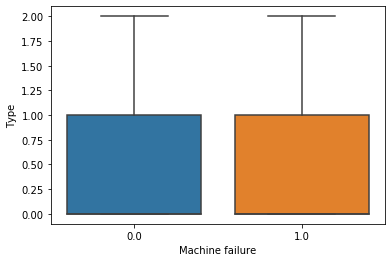

In [50]:
sns.boxplot(y="Type",x="Machine failure",data=df)

In [36]:
from sklearn.model_selection import train_test_split

In [59]:
df_train=df_train.drop(columns=["id","Product ID"],axis=1)

In [65]:
df_train["Type"]=df_train["Type"].map({"L":0,"M":1,"H":2})

In [72]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lr=LinearRegression()

In [76]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
lr.score(X_train,y_train)

0.43118811087276815

In [79]:
!pip install xgboost

In [92]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [98]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]


In [99]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [101]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train.to_numpy(), y_train.to_numpy())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [105]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [103]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.17%


In [ ]:
g=plt.hist(y_test - y_pred,marker='o',linestyle='')

In [2]:
!git remote add origin git@github.com:abdelrahman-Ali-moh/Binary_classifier_ml_failure.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-2-e513e2b879b9>, line 2)